In [2]:
import pyspark as ps
spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("df case study") \
            .getOrCreate()

tweets_df = spark.read.json('../data/french_tweets.json').sample(False, 0.2, seed =25)

In [3]:
dicta={}

for i in range(10):
    s=str(tweets_df[i])
    s=s.strip('"Column<b')
    s=s.strip("'>'")
    dicta[i]=s

    
print(dicta)

{0: 'contributors', 1: 'coordinates', 2: 'created_at', 3: 'display_text_range', 4: 'entities', 5: 'extended_entities', 6: 'extended_tweet', 7: 'favorite_count', 8: 'favorited', 9: 'filter_level'}


In [2]:
#Here to
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'
# docker start sparkbook
import pyspark as ps

spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("case study") 
        .getOrCreate()
        )

# be able to use sc as a SparkContext for compatibility 
# with pre-2.0 RDD-based spark commands
sc = spark.sparkContext

In [3]:
df_json = spark.read.json('../data/french_tweets.json')

# create a temporary table for spark.sql queries
df_json.createOrReplaceTempView('temp1')

# possibly sensitive results for all quoted_status
spark.sql(
'''
SELECT quoted_status.possibly_sensitive,
       COUNT(quoted_status.retweeted) AS count, 
       AVG(quoted_status.retweet_count) AS avg_n_retweets,
       stddev_samp(quoted_status.retweet_count) AS sd_n_retweets,
       max(quoted_status.retweet_count) AS max_n_retweets,
       MIN(quoted_status.retweet_count) AS min_n_retweets
FROM temp1
GROUP BY quoted_status.possibly_sensitive; 
'''
).show()

+------------------+-----+------------------+-----------------+--------------+--------------+
|possibly_sensitive|count|    avg_n_retweets|    sd_n_retweets|max_n_retweets|min_n_retweets|
+------------------+-----+------------------+-----------------+--------------+--------------+
|              null|10875|205.85728735632185|1289.193509294055|         45480|             0|
|              true|  512|    3036.845703125|7845.550715218757|         58847|             0|
|             false|14582|1278.4751748731312|5909.084277615833|        339281|             0|
+------------------+-----+------------------+-----------------+--------------+--------------+



In [ ]:
# HERE 

In [ ]:
s= "[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:46 +0000 2017', display_text_range=[25, 82], entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[Row(id=326757541, id_str='326757541', indices=[0, 9], name=L'Echo Républicain, screen_name='lecho_fr'), Row(id=3482554756, id_str='3482554756', indices=[10, 24], name='La Saucelle Off', screen_name='lasaucelleoff')]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225441157021697, id_str='857225441157021697', in_reply_to_screen_name='lecho_fr', in_reply_to_status_id=817116111389032448, in_reply_to_status_id_str='817116111389032448', in_reply_to_user_id=326757541, in_reply_to_user_id_str='326757541', is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[1.427255, 48.421392], [1.427255, 48.446024], [1.478306, 48.446024], [1.478306, 48.421392]]], type='Polygon'), country='France', country_code='FR', full_name='Lucé, France', id='50d429c8224054f9', name='Lucé', place_type='city', url='https://api.twitter.com/1.1/geo/id/50d429c8224054f9.json'), possibly_sensitive=None, quoted_status=None, quoted_status_id=None, quoted_status_id_str=None, retweet_count=0, retweeted=False, source='<a href=http://twitter.com/download/android rel=nofollow>Twitter for Android</a>', text=@lecho_fr @lasaucelleoff J'espère faire mieux mais c'est pas sûr dieu seul le sait, timestamp_ms='1493213446307', truncated=False, user=Row(contributors_enabled=False, created_at='Mon Dec 05 16:07:15 +0000 2016', default_profile=False, default_profile_image=False, description='Je reste discret sur ma vie comme ça pas de mensonge â vous dire. La photo vous dit la réponse pas compliqué à comprendre?', favourites_count=13, follow_request_sent=None, followers_count=5, following=None, friends_count=20, geo_enabled=True, id=805805743316357120, id_str='805805743316357120', is_translator=False, lang='fr', listed_count=2, location='Centre, France', name='Bjr du Centre', notifications=None, profile_background_color='000000', profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png', profile_background_tile=False, profile_banner_url='https://pbs.twimg.com/profile_banners/805805743316357120/1493199314', profile_image_url='http://pbs.twimg.com/profile_images/856537187592155136/zuiUKOym_normal.jpg', profile_image_url_https='https://pbs.twimg.com/profile_images/856537187592155136/zuiUKOym_normal.jpg', profile_link_color='E81C4F', profile_sidebar_border_color='000000', profile_sidebar_fill_color='000000', profile_text_color='000000', profile_use_background_image=False, protected=False, screen_name='scorpionrouge21', statuses_count=8, time_zone='Paris', url=None, utc_offset=7200, verified=False))]"

In [4]:

tweets_df[1]['retweet_count']

Column<b'coordinates[retweet_count]'>

In [5]:
tweets_df.take(1)

[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:46 +0000 2017', display_text_range=[25, 82], entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[Row(id=326757541, id_str='326757541', indices=[0, 9], name="L'Echo Républicain", screen_name='lecho_fr'), Row(id=3482554756, id_str='3482554756', indices=[10, 24], name='La Saucelle Off', screen_name='lasaucelleoff')]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225441157021697, id_str='857225441157021697', in_reply_to_screen_name='lecho_fr', in_reply_to_status_id=817116111389032448, in_reply_to_status_id_str='817116111389032448', in_reply_to_user_id=326757541, in_reply_to_user_id_str='326757541', is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[1.427255, 48.421392], [1.427255, 48.446024], [1.478306, 48.446024], [1.478306, 48.421392]]], type='Polygon'), country='France', country_code='FR',

In [7]:
tweets_df.take(2)

[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:46 +0000 2017', display_text_range=[25, 82], entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[Row(id=326757541, id_str='326757541', indices=[0, 9], name="L'Echo Républicain", screen_name='lecho_fr'), Row(id=3482554756, id_str='3482554756', indices=[10, 24], name='La Saucelle Off', screen_name='lasaucelleoff')]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225441157021697, id_str='857225441157021697', in_reply_to_screen_name='lecho_fr', in_reply_to_status_id=817116111389032448, in_reply_to_status_id_str='817116111389032448', in_reply_to_user_id=326757541, in_reply_to_user_id_str='326757541', is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[1.427255, 48.421392], [1.427255, 48.446024], [1.478306, 48.446024], [1.478306, 48.421392]]], type='Polygon'), country='France', country_code='FR',

In [14]:
tweets_df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |

In [3]:
import pandas as pd
import numpy as np


In [4]:
sam = tweets_df.sample(.50)

In [5]:
sample_count = sam.count()

In [6]:
print(sample_count)

21560


In [7]:
sam.createOrReplaceTempView("tweet_sample1")

In [8]:
result1 = spark.sql('''
                SELECT id, text, created_at,tweet_sample1.quoted_status.user.favourites_count
                FROM tweet_sample1
                ORDER BY tweet_sample1.quoted_status.user.favourites_count DESC
''')

result1.show(3)

+------------------+--------------------+--------------------+----------------+
|                id|                text|          created_at|favourites_count|
+------------------+--------------------+--------------------+----------------+
|857529039728381952|Les #Jobs de dema...|Thu Apr 27 09:37:...|          420115|
|857563753105289217|Just for once i a...|Thu Apr 27 11:55:...|          354878|
|857992085563158533|Salut c est genti...|Fri Apr 28 16:17:...|          279186|
+------------------+--------------------+--------------------+----------------+
only showing top 3 rows



In [14]:
for i in range(len(dicta)):
    
    s=dicta[i] 
    print(dicta[i])
    print(s)
    
    result[i] = spark.sql('''
                SELECT *
                FROM tweet_sample1
                ''')
    
    print(result[i].show( ))



contributors
contributors


AnalysisException: Table or view not found: tweet_sample1; line 3 pos 21;
'Project [*]
+- 'UnresolvedRelation [tweet_sample1]


In [10]:
tweets_df[i]

Column<b'contributors'>

In [11]:
resultq = spark.sql('''
                SELECT id, text, user.screen_name, user.favourites_count
                FROM tweet_sample1
                
              
''')

resultq.show() 

+------------------+--------------------+---------------+----------------+
|                id|                text|    screen_name|favourites_count|
+------------------+--------------------+---------------+----------------+
|857225456529092611|@1001portails Mai...|      icp3_zero|           44558|
|857225468659068929|Il  bégaye comme ...|     Raf_Heddid|            6656|
|857225502062505984|I wonder what the...|   harry_chitty|            3949|
|857225534178299905|@Maroussiia_ Ahah...|     vltdalbane|           12338|
|857225589903810560|j'aurais jms dû a...|         Woroox|            4741|
|857225634975809536|Sans déconner, ma...|lucaas_vieira21|            1156|
|857225665153826820|@fredericmorea11 ...|      2cevennes|           16457|
|857225726839459841|@SportEte 
Sport'...|       SportEte|              92|
|857225749043888128|⚜️ @ Heaven https...|    nonykarlina|              18|
|857225837313228800|será q eu to doen...|     bbrutinha_|            4674|
|857225872708915201|Landk

In [133]:


result2 = spark.sql('''
                SELECT id, text, tweet_sample1.user.retweet_count
                FROM tweet_sample1
                ORDER BY tweet_sample1.retweet_count DESC
''')

result2.show()

+------------------+--------------------+-------------+
|                id|                text|retweet_count|
+------------------+--------------------+-------------+
|857626515546271744|les nouveautés gr...|            0|
|857626537096556545|@Djamst40Sisi @Na...|            0|
|857626550614863872|@Lacoussiere De l...|            0|
|857626569036021760|Présentation du C...|            0|
|857626619317547008|jsp https://t.co/...|            0|
|857626823081046018|Mon père https://...|            0|
|857626832253923328|https://t.co/baal...|            0|
|857626835953307651|@emzregina Merci ...|            0|
|857626858283773953|Recu ! Monté ! Te...|            0|
|857626860238372864|Pour toutes infor...|            0|
|857626871319732225|yes 😏 https://t....|            0|
|857626887857766402|.@carolineroux @C...|            0|
|857626970556964864|⭐ Casting sous le...|            0|
|857626990400208896|Türkiye'ye dair ö...|            0|
|857626997270491137|😂 https://t.co/t...|         

In [135]:
some_var = result2.toPandas()

In [138]:
some_var['retweet_count'].max()

0

In [118]:
result3 = spark.sql('''
                SELECT id, text, created_at, tweet_sample1.quoted_status.user.followers_count
                FROM tweet_sample1
                ORDER BY tweet_sample1.quoted_status.user.followers_count DESC
''')

result3.show()

+------------------+--------------------+--------------------+---------------+
|                id|                text|          created_at|followers_count|
+------------------+--------------------+--------------------+---------------+
|857836007609311232|Moi aussi je veux...|Fri Apr 28 05:56:...|       52334711|
|857650207969955840|awwwn, beyond pro...|Thu Apr 27 17:38:...|       51196690|
|857261750105845760|$400,000 to speak...|Wed Apr 26 15:55:...|       35588396|
|857930276592381954|Bordel de merde h...|Fri Apr 28 12:11:...|       29988889|
|857930099689222145|MON DÉCÈS EST OFF...|Fri Apr 28 12:10:...|       29988884|
|858110739726446592|Non mais putain o...|Sat Apr 29 00:08:...|       28446210|
|857621071125766144|we spend more on ...|Thu Apr 27 15:42:...|       28396890|
|857553736205553666|Trump tries to sh...|Thu Apr 27 11:15:...|       28384051|
|857244896104775680|Elle a réveillé e...|Wed Apr 26 14:48:...|       22180074|
|858090075435020289|La louche de Ronn...|Fri Apr 28 

In [126]:
result3.count()

21654

In [89]:
df3 = result3.toPandas() 

In [119]:
df5=result3.toPandas()

In [120]:
df5.dropna(inplace=True)

In [121]:
df5.head(2)

id                                               text  \
0  857836007609311232  Moi aussi je veux jouer dans une piscine avec ...   
1  857650207969955840  awwwn, beyond proud of you Keeks ❤️❤️ https://...   

                       created_at  followers_count  
0  Fri Apr 28 05:56:56 +0000 2017       52334711.0  
1  Thu Apr 27 17:38:38 +0000 2017       51196690.0

In [123]:
macron_tweets = df5[df5['text'].str.contains('Macron')]
print(macron_tweets['followers_count'].sum())


le_pen_tweets = df5[df5['text'].str.contains('Le Pen')]
#print(le_pen_tweets)
print(le_pen_tweets['followers_count'].sum())



17318016.0
2550388.0


In [124]:
print(17318016+2550388)

19868404


In [96]:
print(macron_tweets)

                       id                                               text  \
1      858028863116500993  @LePenNON Lui non plus n'a pas envie d'aller v...   
157    857996336830066690  @Gerard_Larcher est clair le vote républicain ...   
200    857942378698690561  #DangerMacron venant de la part du FM, ça me f...   
241    857504967296417792  @EmmanuelMacron @TeamMacron2017 @BFMPolitique ...   
264    857960035602903040  Ca ressemble beaucoup à la famille Addams #AuN...   
...                   ...                                                ...   
21566  858164535248777216  #Macron a fait une erreur en se rendant à #ora...   
21587  858170998444761088  @Benedicte1512 @EmmanuelMacron Là, on a le pom...   
21621  858179239958515712  @KikiReynaud @slashorz @mwesfreid @Deemee3 @Em...   
21626  858180364585533440  @hemicycliste @DanielPilotte @actufr_officiel ...   
21635  858181787746545664   @EmmanuelMacron Tu lui arrive pas à la cheville.   

                           created_at  

In [97]:
print(le_pen_tweets)

                       id                                               text  \
375    857246568151474176       Macron 1 - Le Pen 0. https://t.co/6mHTPOo3jy   
400    857686491031638016  Le Pen following the Trump playbook https://t....   
778    857530670096240640  A trop dénigrer Macron on va se payer Le Pen.....   
1043   857242850865684480  Ça pique même plus encore. En ne disant pas Le...   
1127   857709735210037250  Ça c'est pour avoir voté Le Pen https://t.co/Z...   
...                   ...                                                ...   
19368  858041216755265536  #BFMTV\n\nLe Pen n' a fait qu' haranguer (sans...   
19801  858052141788934146  Le pacte de Dupont-Aignan avec Le Pen: les des...   
20345  858065254978383872     "l'Europe s'est radicalisée"\n_ Marine Le Pen.   
20538  858070764490289153  Eh je vous jure retirez le droit de vote à ma ...   
21431  858110852360278016  Non la France n'est pas fasciste non la France...   

                           created_at  

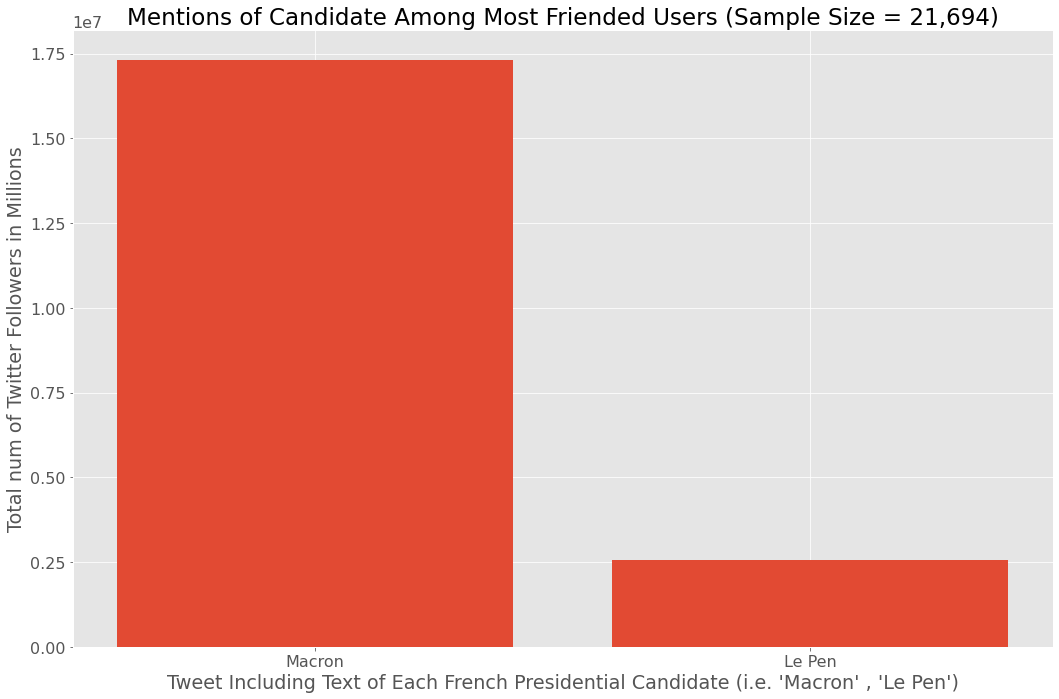

In [127]:
#print(+
# Plotting Code for Bar Charts

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

fav_counts = pd.DataFrame({'candidate' : ['Macron', 'Le Pen'],
                           'Friend_count' : [17318016,2550388]})

x = np.arange(len(fav_counts['candidate']))

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x,fav_counts['Friend_count'])
ax.set_xticks(x)
ax.set_xticklabels(fav_counts['candidate'])
ax.set_title("Mentions of Candidate Among Most Friended Users (Sample Size = 21,694)")
ax.set_xlabel("Tweet Including Text of Each French Presidential Candidate (i.e. 'Macron' , 'Le Pen')")
ax.set_ylabel("Total num of Twitter Followers in Millions")
plt.tight_layout()
plt.show()

In [116]:
plt.savefig('friends.png', dpi=300, bbox_inches ='tight')

<Figure size 432x288 with 0 Axes>

In [117]:
plt.savefig('try2.png', dpi=300)

<Figure size 432x288 with 0 Axes>